In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ElasticNet
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

In [98]:
df=pd.read_csv('C:\\Users\\ChefAbi\\Downloads\\CarPrice_Assignment (1).csv')

In [99]:
df.shape

(205, 26)

In [100]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [102]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [103]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<AxesSubplot:>

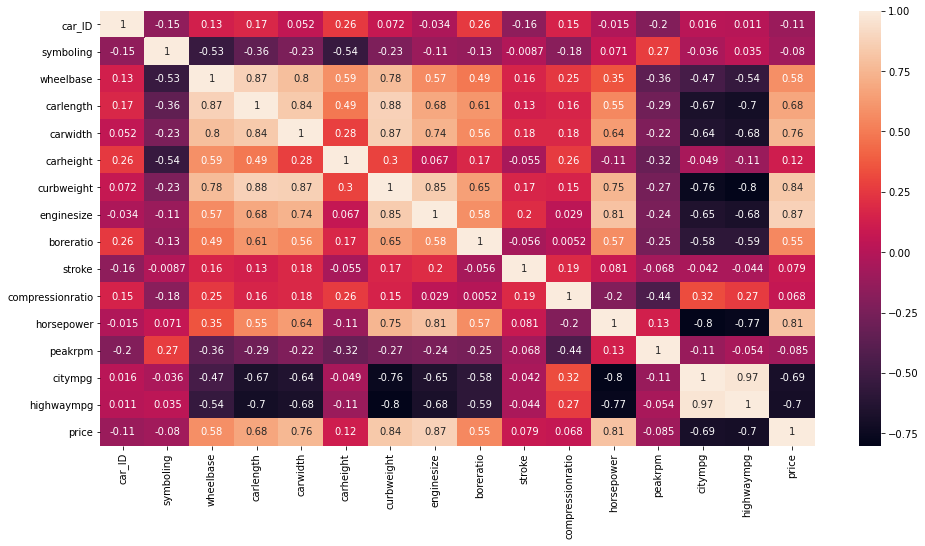

In [104]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

In [105]:
high_corr=[]
col_name=[]
a=df.corr()
for i in range(len(df.corr())):
    for j in range(i):
        if abs(a.iloc[i,j])>0.9: #threshold is 0.9
            col_name.append(a.columns[i])
            high_corr.append(a.iloc[i,j])
            b=list(zip(col_name,high_corr))
print(b)

[('highwaympg', 0.9713370423425045)]


In [106]:
df.drop('highwaympg',axis=1,inplace=True)

In [107]:
df.shape

(205, 25)

In [108]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0


In [109]:
df['CarName'].nunique()

147

In [110]:
df.drop(['car_ID','CarName'],axis=1,inplace=True)

In [111]:
for i in df.columns:
    print(i,":",df[i].nunique())

symboling : 6
fueltype : 2
aspiration : 2
doornumber : 2
carbody : 5
drivewheel : 3
enginelocation : 2
wheelbase : 53
carlength : 75
carwidth : 44
carheight : 49
curbweight : 171
enginetype : 7
cylindernumber : 7
enginesize : 44
fuelsystem : 8
boreratio : 38
stroke : 37
compressionratio : 32
horsepower : 59
peakrpm : 23
citympg : 29
price : 189


In [112]:
df['symboling']=df['symboling'].astype('object')

In [113]:
num_cols=[col for col in df.select_dtypes('number')]
cat_cols=[col for col in df.select_dtypes('object')]

In [114]:
num_cols

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'price']

In [115]:
num_cols.remove('price')

In [116]:
cat_cols

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

# EDA

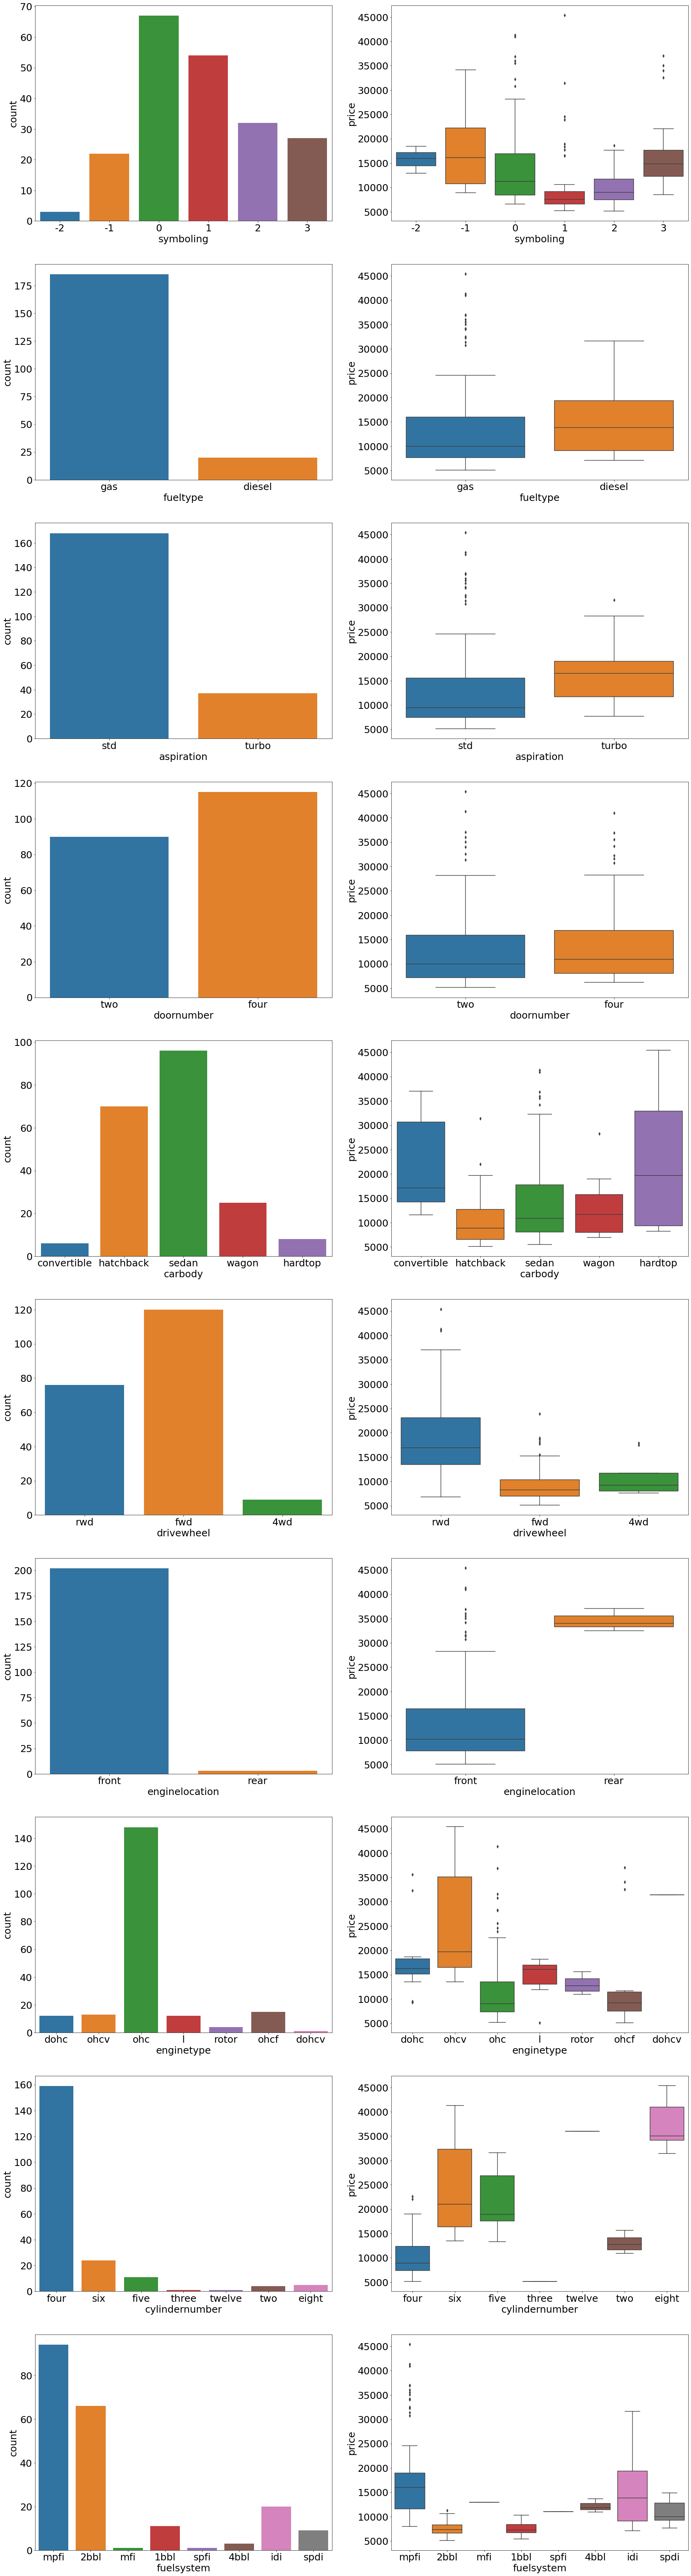

In [117]:
plt.figure(figsize=(30,120))
i=1
for col in cat_cols:
    plt.subplot(10,2,i)
    sns.countplot(df[col])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel('count',fontsize=25)
    
    i=i+1
    plt.subplot(10,2,i)
    sns.boxplot(df[col],df['price'])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel('price',fontsize=25)
    
    i=i+1


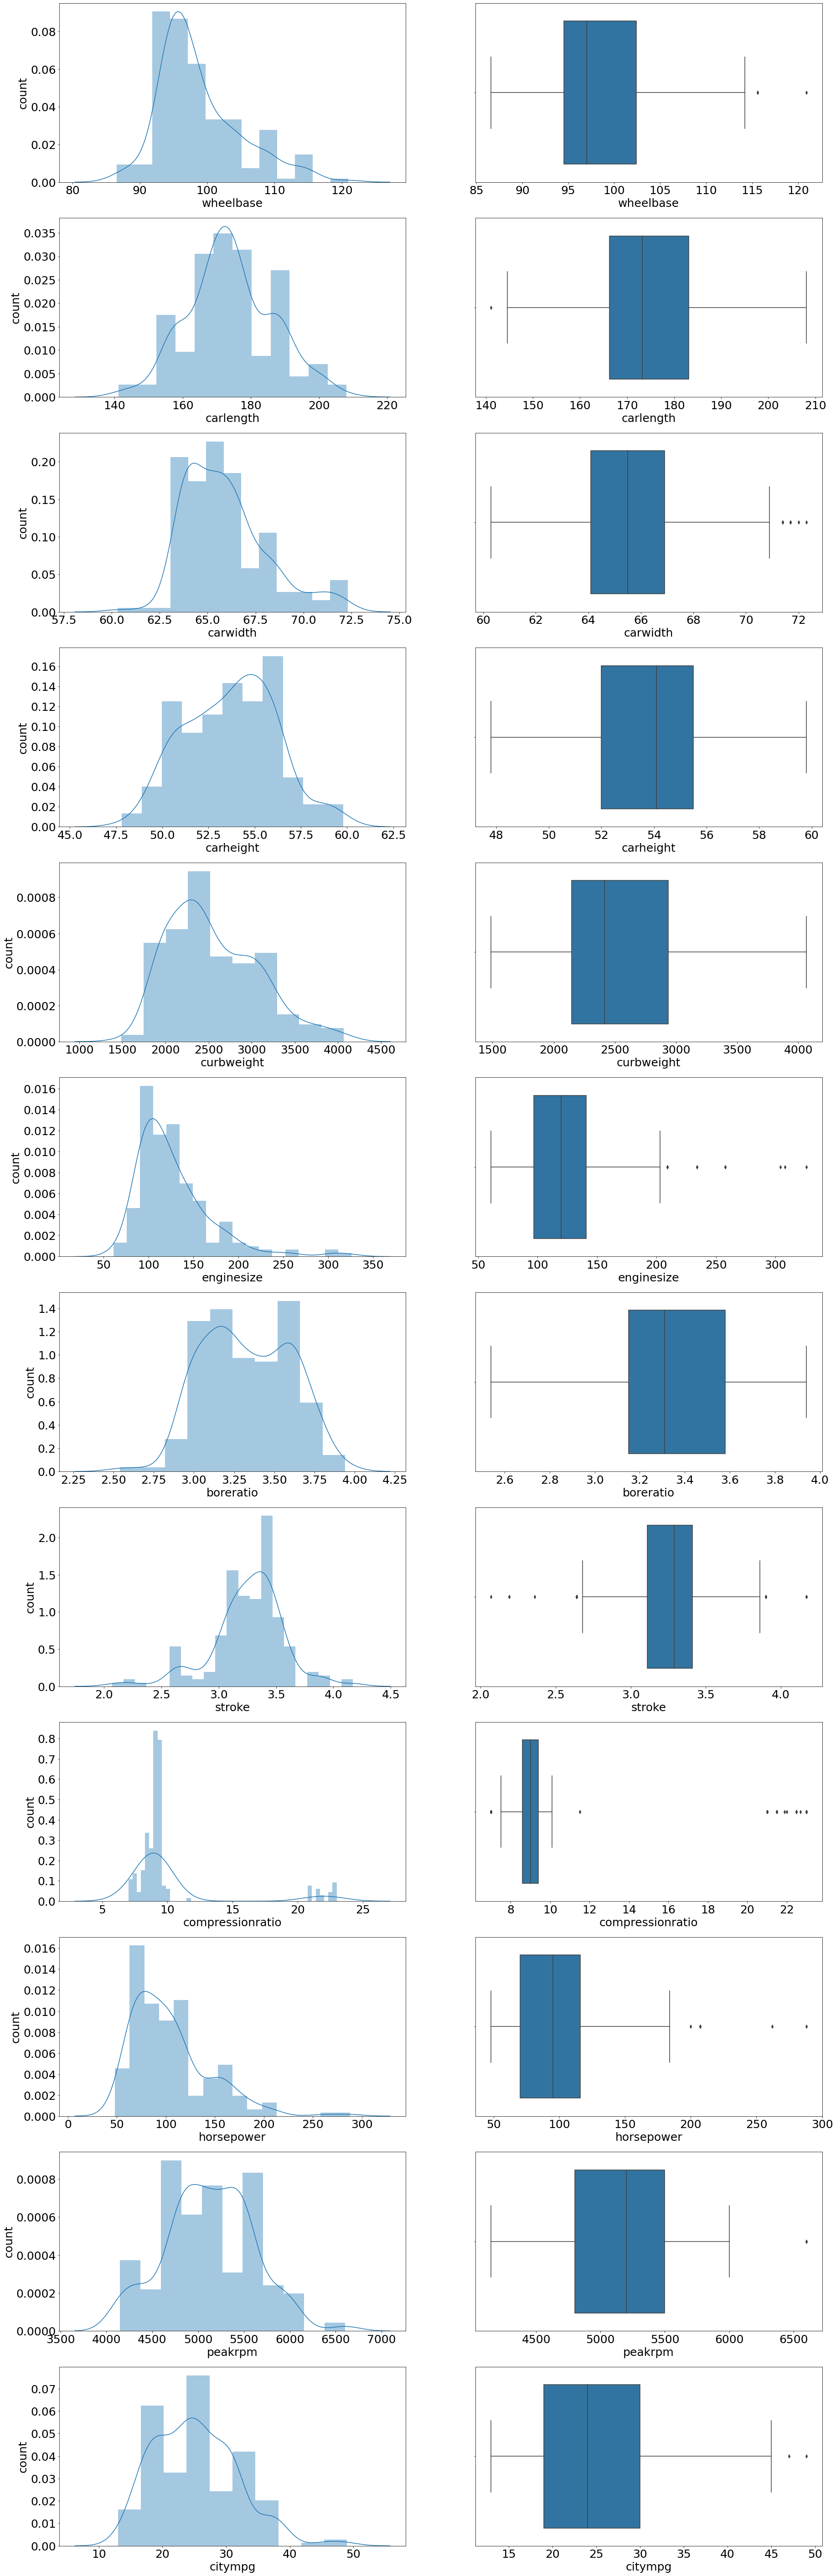

In [118]:
plt.figure(figsize=(30,120))
i=1
for col in num_cols:
    plt.subplot(14,2,i)
    sns.distplot(df[col])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel('count',fontsize=25)
    
    i=i+1
    plt.subplot(14,2,i)
    sns.boxplot(df[col])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    
    i=i+1

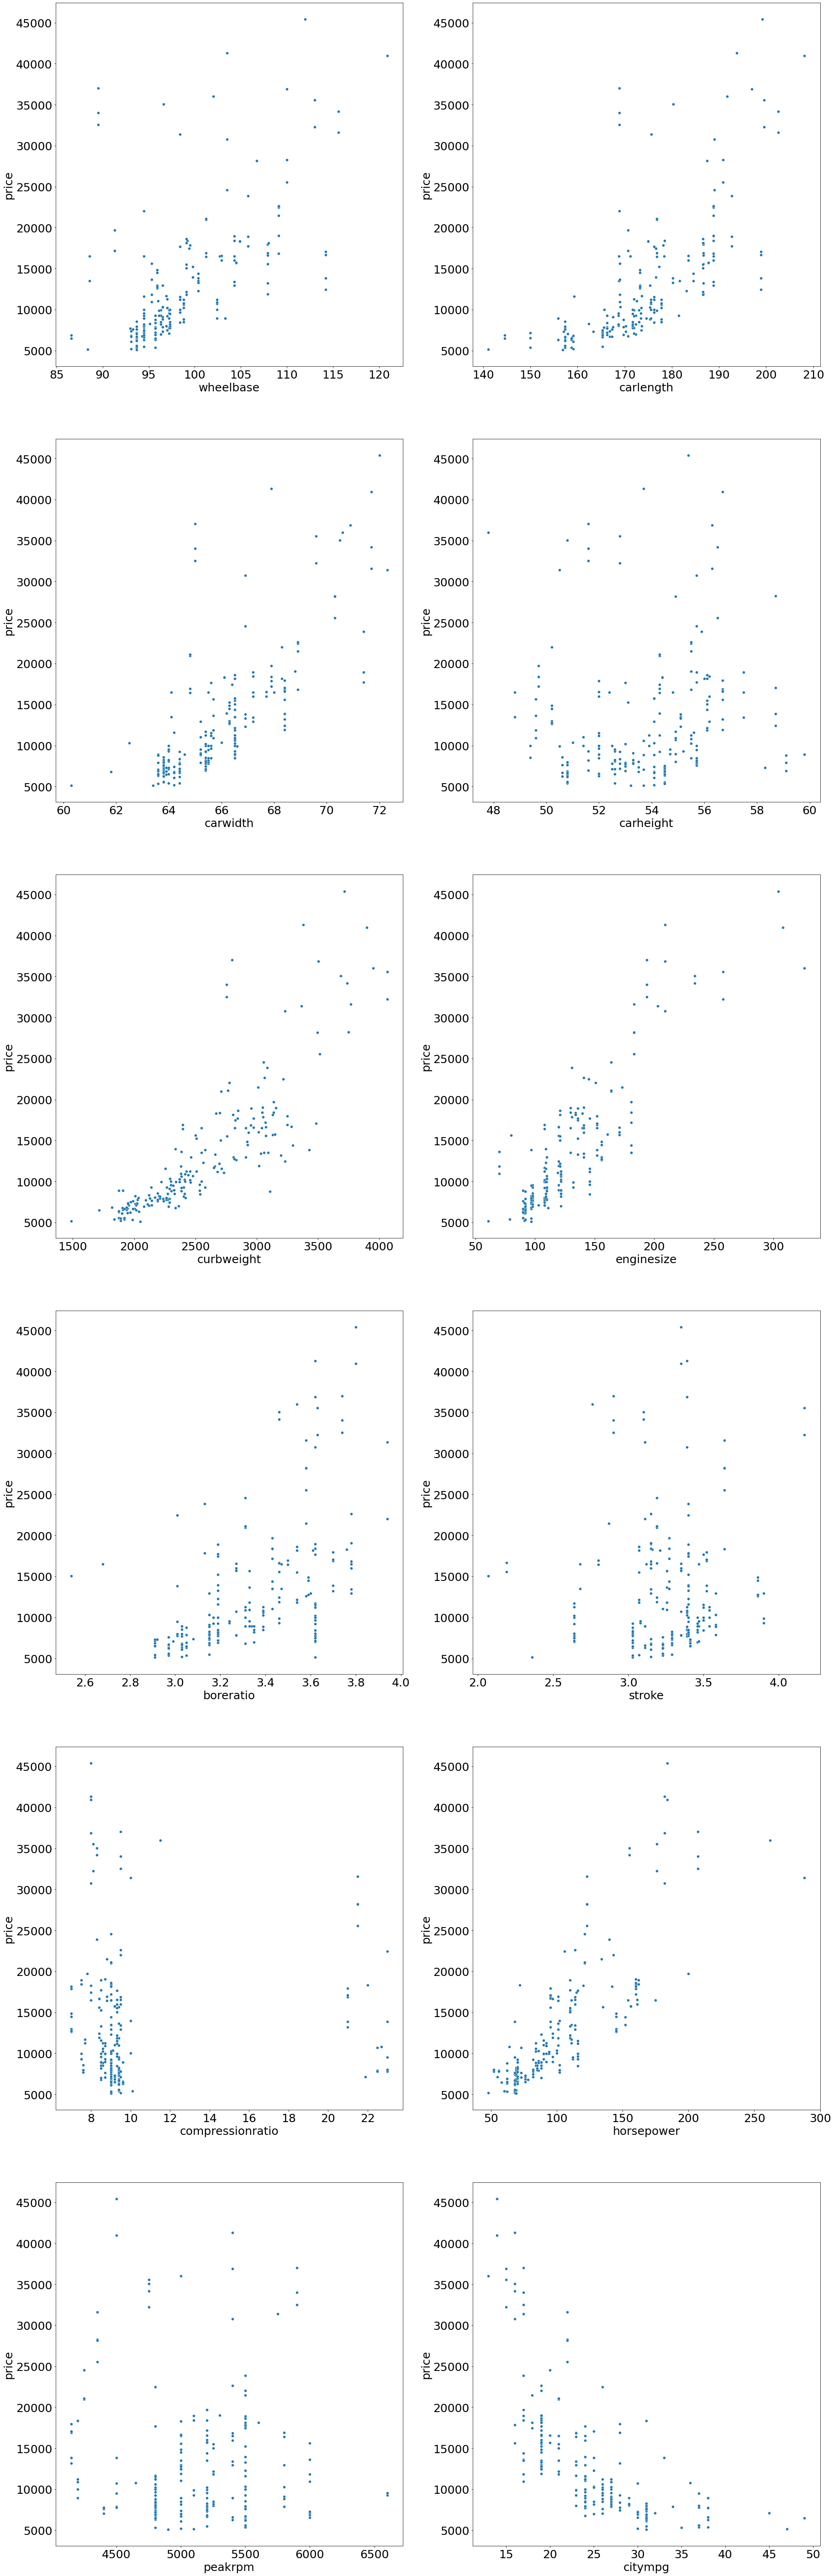

In [119]:
plt.figure(figsize=(30,120))
i=1
for col in num_cols:
    plt.subplot(7,2,i)
    sns.scatterplot(df[col],df['price'])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel('price',fontsize=25)
    
    i=i+1
    
   

<AxesSubplot:xlabel='price', ylabel='Density'>

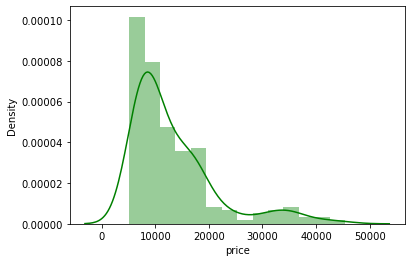

In [120]:
sns.distplot(df['price'],kde=True,color='green')

In [121]:
df['price'].skew()

1.7776781560914454

In [122]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0


In [123]:
#transform the price col using log transformer
ft=FunctionTransformer(func=np.log1p)
df["price"]=ft.fit_transform(df["price"])

<AxesSubplot:xlabel='price', ylabel='Density'>

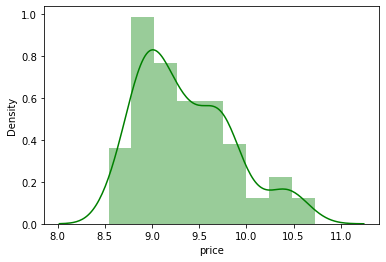

In [124]:
sns.distplot(df['price'],kde=True,color='green')

In [125]:
df['price'].skew()

0.6729635607485753

In [126]:
for i in num_cols:
    print(df[i].skew())

1.0502137758714858
0.1559537713215604
0.904003498786254
0.06312273247192804
0.681398189052588
1.9476550452788108
0.02015641810424137
-0.6897045784233837
2.6108624576151533
1.4053101543373119
0.07515872237118956
0.6637040288148164


In [127]:
def skew_data(data):
    
    for i in data:
        if data[i].skew()>0.75:           
            ft=FunctionTransformer(func=np.log1p)
            data[i]=ft.fit_transform(data[i])
            
            plt.figure(figsize=(15,50))
            j=1
        
            plt.subplot(len(data.columns),2,j)
            sns.distplot(data[i],kde=True,color='red')
            plt.xticks(fontsize=15)
            plt.yticks(fontsize=15)
            plt.xlabel(i,fontsize=15)
            plt.ylabel('Density',fontsize=15)
            j=j+1
                

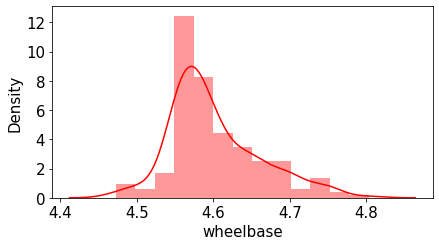

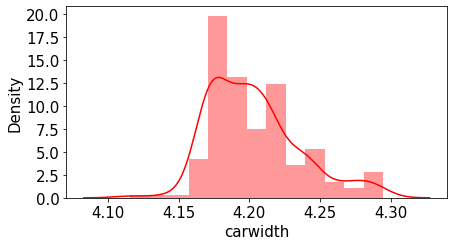

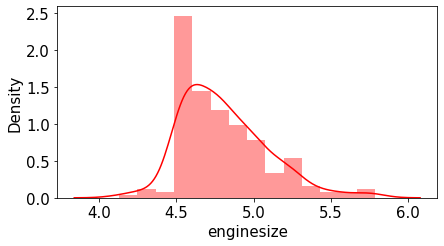

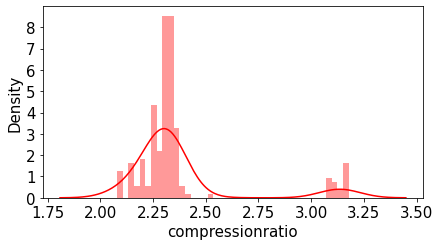

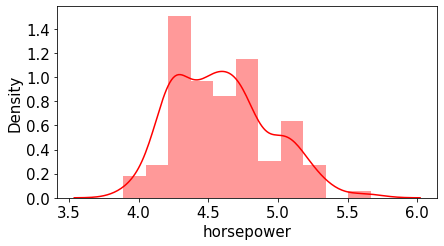

In [128]:
skew_data(df[num_cols])

In [129]:
#let's handle categorical columns

In [130]:
#ordinal_encoder = OrdinalEncoder()
#df[cat_cols] = ordinal_encoder.fit_transform(df[cat_cols])


In [131]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,9.510149
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,9.711176
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,9.711176
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,9.543306
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,9.767152


In [132]:
#scaling all the columns 

In [133]:
X=df.drop('price',axis=1)
y=df['price']

In [135]:
X=pd.get_dummies(X,columns=cat_cols,drop_first=True)

In [136]:
X

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,0,0,0,1,0,0,0,0


In [137]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [138]:
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
201,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
202,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
203,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,3.041381,-0.070014,-0.920243,-0.214286,-0.070014


In [139]:
X.columns=df.drop('price',axis=1).columns

ValueError: Length mismatch: Expected axis has 46 elements, new values have 22 elements

In [140]:
X

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
201,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
202,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
203,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,3.041381,-0.070014,-0.920243,-0.214286,-0.070014


In [142]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (164, 46)
X_test shape:  (41, 46)
Y_train shape:  (164,)
Y_test shape:  (41,)


In [143]:
def evaluate(model):
    model.fit(X_train,y_train)
    y_pred_m=model.predict(X_test) 
    
    #(Y_pred_m) and (y_test) contain log transformed values not real valued price ..
    #so we inversely apply log transform to get real price value...
    ft=FunctionTransformer(func=np.log1p,inverse_func=np.exp)
    inv_y_pred=ft.inverse_transform(y_pred_m)
    inv_y_test=ft.inverse_transform(y_test)
    
    #printing the model name and accuracy !!!!!
    print("Model name: ",model)
    print("R2 score :--->>",r2_score(inv_y_test,inv_y_pred))
    print("MSE :--->>",mean_squared_error(inv_y_test,inv_y_pred))
    print("MAE :--->>",mean_absolute_error(inv_y_test,inv_y_pred))
    print("<<<<------------------------------------------------------------->>>>")

In [144]:
lr=LinearRegression() #Linear regressor
lasso=LassoCV() #Lasso regression
R=RidgeCV() #Ridge regression
knn=KNeighborsRegressor() 
svr=SVR() # support vector regressor
dtr=DecisionTreeRegressor()

models=[lr,lasso,R,knn,svr,dtr] #create a list of models 

for model in models:
    evaluate(model)

Model name:  LinearRegression()
R2 score :--->> 0.8658928023375939
MSE :--->> 10586961.412373373
MAE :--->> 1951.5422610193687
<<<<------------------------------------------------------------->>>>
Model name:  LassoCV()
R2 score :--->> 0.8728607155296797
MSE :--->> 10036886.327849712
MAE :--->> 1814.2534994154375
<<<<------------------------------------------------------------->>>>
Model name:  RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
R2 score :--->> 0.8947369128986497
MSE :--->> 8309891.345986229
MAE :--->> 1829.6305482717698
<<<<------------------------------------------------------------->>>>
Model name:  KNeighborsRegressor()
R2 score :--->> 0.8070731585779585
MSE :--->> 15230420.597468054
MAE :--->> 2732.339970954727
<<<<------------------------------------------------------------->>>>
Model name:  SVR()
R2 score :--->> 0.8391908874105036
MSE :--->> 12694917.941904433
MAE :--->> 2128.8415517815574
<<<<------------------------------------------------------------->>>>
Model name:  

In [145]:
rf=RandomForestRegressor(n_estimators=200,random_state=42)
ada=AdaBoostRegressor(random_state=42)
gbr=GradientBoostingRegressor(random_state=42)
xgb=XGBRegressor()

modls=[rf,ada,gbr,xgb] #list of ensamble models 
for model in modls:
    evaluate(model)
    
#It's show time ,Yaaaaaah

Model name:  RandomForestRegressor(n_estimators=200, random_state=42)
R2 score :--->> 0.9574600789121697
MSE :--->> 3358272.4185766666
MAE :--->> 1287.515772822752
<<<<------------------------------------------------------------->>>>
Model name:  AdaBoostRegressor(random_state=42)
R2 score :--->> 0.903001217933031
MSE :--->> 7657473.876796171
MAE :--->> 1928.4112671095463
<<<<------------------------------------------------------------->>>>
Model name:  GradientBoostingRegressor(random_state=42)
R2 score :--->> 0.9283359071815381
MSE :--->> 5657451.639782381
MAE :--->> 1619.597644224308
<<<<------------------------------------------------------------->>>>
Model name:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, 